## Customer Segmentation and Corhort Analysis

In [1]:
# Data wrangling
import numpy as np
import pandas as pd
import datetime as dt
# Data modeling
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
# plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#  plt.style.available

In [3]:
# https://archive.ics.uci.edu/ml/datasets/online+retail
online = pd.read_csv('1online.csv',index_col = 'Unnamed: 0', parse_dates  = ['InvoiceDate'])

In [4]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [5]:
# # Define a function that will parse the date
# def get_day(x): return dt.datetime(x.year, x.month, x.day)

# # Create InvoiceDay column
# online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# # Group by CustomerID and select the InvoiceDay value
# grouping = online.groupby('CustomerID')['InvoiceDay'] 

# # Assign a minimum InvoiceDay value to the dataset
# online['CohortDay'] = grouping.transform('min')

# # View the top 5 rows
# print(online.head())

In [6]:
# Define a function that will parse the date
def get_month(x): return dt.datetime(x.year, x.month, 1)

# Create InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = online.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceMonth value to the dataset
online['CohortMonth'] = grouping.transform('min')

# View the top 5 rows
print(online.head())

        InvoiceNo StockCode                      Description  Quantity  \
416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
204384     554656     21756         BATH BUILDING BLOCK WORD         3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
416792 2011-10-25 08:26:00       2.10       14286  United Kingdom   
482904 2011-11-20 11:56:00       1.45       16360  United Kingdom   
263743 2011-07-14 13:35:00       3.75       13933  United Kingdom   
495549 2011-11-23 15:53:00       2.10       17290  United Kingdom   
204384 2011-05-25 13:36:00       5.95       17663  United Kingdom   

       InvoiceMonth CohortMonth  
416792   2011-10-01  2011-04-01  
482904   2011-11-01  2011-09-01  
263743   2011-07-01  2011-07-01  
4955

In [7]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [8]:
# # Get the integers for date parts from the `InvoiceDay` column
# invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# # Get the integers for date parts from the `CohortDay` column
# cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

In [9]:
# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

In [10]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in month from all previous values 
online['CohortIndex'] = years_diff * 12 + months_diff  + 1

# # Calculate difference in days
# days_diff = invoice_day - cohort_day

# # Extract the difference in days from all previous values 
# online['CohortIndex'] = years_diff * 365 + months_diff * 12 + days_diff + 1

print(online.head())

        InvoiceNo StockCode                      Description  Quantity  \
416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
204384     554656     21756         BATH BUILDING BLOCK WORD         3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
416792 2011-10-25 08:26:00       2.10       14286  United Kingdom   
482904 2011-11-20 11:56:00       1.45       16360  United Kingdom   
263743 2011-07-14 13:35:00       3.75       13933  United Kingdom   
495549 2011-11-23 15:53:00       2.10       17290  United Kingdom   
204384 2011-05-25 13:36:00       5.95       17663  United Kingdom   

       InvoiceMonth CohortMonth  CohortIndex  
416792   2011-10-01  2011-04-01            7  
482904   2011-11-01  2011-09-01            3  

In [11]:
online['CohortIndex'] .unique()

array([ 7,  3,  1,  4, 10,  6,  5,  2, 11,  8,  9, 13, 12], dtype=int64)

In [12]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [13]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
print(cohort_counts)


CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2010-12-01   716.0  246.0  221.0  251.0  245.0  285.0  249.0  236.0  240.0   
2011-01-01   332.0   69.0   82.0   81.0  110.0   90.0   82.0   86.0  104.0   
2011-02-01   316.0   58.0   57.0   83.0   85.0   74.0   80.0   83.0   86.0   
2011-03-01   388.0   63.0  100.0   76.0   83.0   67.0   98.0   85.0  107.0   
2011-04-01   255.0   49.0   52.0   49.0   47.0   52.0   56.0   59.0   17.0   
2011-05-01   249.0   40.0   43.0   36.0   52.0   58.0   61.0   22.0    NaN   
2011-06-01   207.0   33.0   26.0   41.0   49.0   62.0   19.0    NaN    NaN   
2011-07-01   173.0   28.0   31.0   38.0   44.0   17.0    NaN    NaN    NaN   
2011-08-01   139.0   30.0   28.0   35.0   14.0    NaN    NaN    NaN    NaN   
2011-09-01   279.0   56.0   78.0   34.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   318.0   67.0   30.0    NaN    NaN    NaN    NaN    

In [14]:
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [15]:
# review the retention table
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


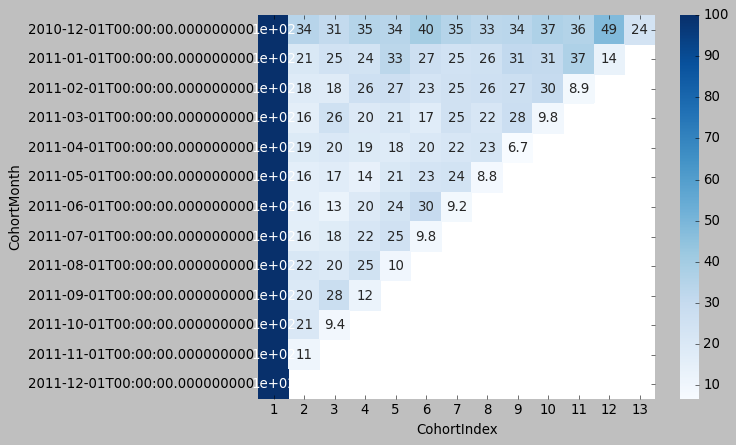

In [16]:
sns.heatmap(retention.round(3) * 100, annot=True, cmap='Blues')
plt.show()

In [17]:
# Average quantity for each cohort
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 
cohort_data = grouping['Quantity'].mean() 
cohort_data = cohort_data.reset_index() 
average_quantity = cohort_data.pivot(index='CohortMonth',  
                                     columns='CohortIndex',  
                                     values='Quantity') 
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN
2011-05-01,14.1,9.6,15.3,11.6,11.9,8.5,9.8,7.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.6,16.1,18.1,11.2,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.9,16.4,5.6,10.1,6.2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.5,7.4,5.5,5.7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_quantity.index = average_quantity.index.to_period('M')
print(average_quantity.round(1))

CohortIndex   1    2    3    4    5    6    7    8    9    10   11   12   13
CohortMonth                                                                 
2010-12      3.0  3.0  3.0  2.8  2.7  6.9  2.8  3.0  2.7  2.7  3.0  2.8  2.6
2011-01      3.2  3.1  3.0  3.0  3.1  3.0  3.0  2.5  2.7  2.9  2.6  2.0  NaN
2011-02      3.1  4.0  3.3  2.9  3.3  2.9  2.8  2.7  2.9  2.7  3.1  NaN  NaN
2011-03      3.5  3.6  3.5  2.8  2.7  2.5  2.7  2.9  2.5  2.4  NaN  NaN  NaN
2011-04      3.3  4.4  3.4  2.6  2.8  2.8  2.8  2.6  2.6  NaN  NaN  NaN  NaN
2011-05      3.1  2.8  2.5  2.7  2.5  2.3  2.7  2.3  NaN  NaN  NaN  NaN  NaN
2011-06      2.8  2.4  2.7  3.1  2.5  2.4  2.5  NaN  NaN  NaN  NaN  NaN  NaN
2011-07      3.2  3.1  3.4  2.5  2.4  2.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-08      2.9  3.7  5.4  6.9  4.2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-09      2.9  3.1  3.0  2.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2011-10      2.9  2.7  2.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

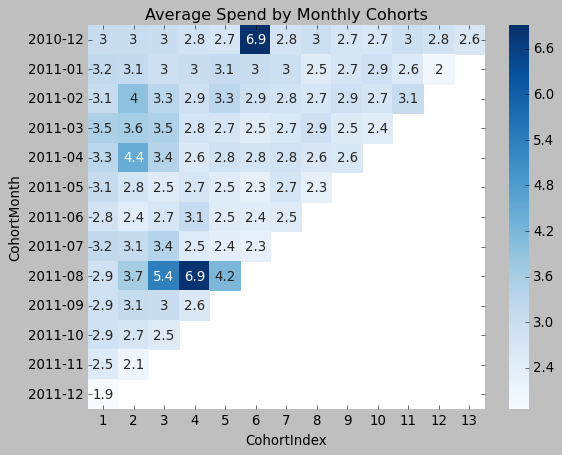

In [19]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8,6))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_quantity, annot=True, cmap='Blues')
plt.show()

In [20]:
import time
snapshot_date=dt.datetime.strptime('2011-12-10', "%Y-%m-%d")
type(snapshot_date)
snapshot_date - online.InvoiceDate.max()

Timedelta('0 days 11:11:00')

## Recency, Frequency, Monetary (RFM) segmentation

In [21]:
online = pd.read_csv('2online12M.csv',index_col = 'Unnamed: 0', parse_dates  = ['InvoiceDate'])

In [22]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,12.60
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,1.45
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,22.50
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2.10
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,17.85


In [23]:
# Calculate Recency, Frequency and Monetary value for each customer 
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
print(datamart.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12747             3         25         948.70
12748             1        888        7046.16
12749             4         37         813.45
12820             4         17         268.02
12822            71          9         146.15


In [24]:
# Create labels for Recency
r_labels = range(4, 0, -1); 

# Create labels for Frequency and MonetaryValue
f_labels = range(1, 5)
m_labels = range(1, 5)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=4, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=4, labels=f_labels)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(datamart['MonetaryValue'], q=4, labels=m_labels)

# Create new columns R and F 
datamart = datamart.assign(R=r_groups.values, F=f_groups.values, M=m_groups)

In [25]:
type(f_groups)

pandas.core.series.Series

In [26]:
datamart.head(20)

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12747,3,25,948.70,4,4,4
12748,1,888,7046.16,4,4,4
12749,4,37,813.45,4,4,4
12820,4,17,268.02,4,3,3
12822,71,9,146.15,2,2,3
12823,297,1,306.00,1,1,3
12824,60,6,106.38,2,2,2
12826,3,16,272.66,4,3,3
12827,33,2,44.55,3,1,1


In [27]:
# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
print(datamart['RFM_Score'].head())

CustomerID
12747    12
12748    12
12749    12
12820    10
12822     7
Name: RFM_Score, dtype: int64


In [28]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif (df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

# Print top 5 rows to the console
print(datamart[:5])

            Recency  Frequency  MonetaryValue  R  F  M  RFM_Score RFM_Level
CustomerID                                                                 
12747             3         25         948.70  4  4  4         12       Top
12748             1        888        7046.16  4  4  4         12       Top
12749             4         37         813.45  4  4  4         12       Top
12820             4         17         268.02  4  3  3         10       Top
12822            71          9         146.15  2  2  3          7    Middle


In [29]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',  
    # Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         180.8       3.2          52.7  1075
Middle       73.9      10.7         202.9  1547
Top          20.3      47.1         959.7  1021


In [30]:
datamart_rfm = datamart[['Recency','Frequency','MonetaryValue']]
datamart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,3643.00000,3643.000000,3643.000000
mean,90.43563,18.714247,370.694387
std,94.44651,43.754468,1347.443451
min,1.00000,1.000000,0.650000
25%,19.00000,4.000000,58.705000
50%,51.00000,9.000000,136.370000
75%,139.00000,21.000000,334.350000
max,365.00000,1497.000000,48060.350000


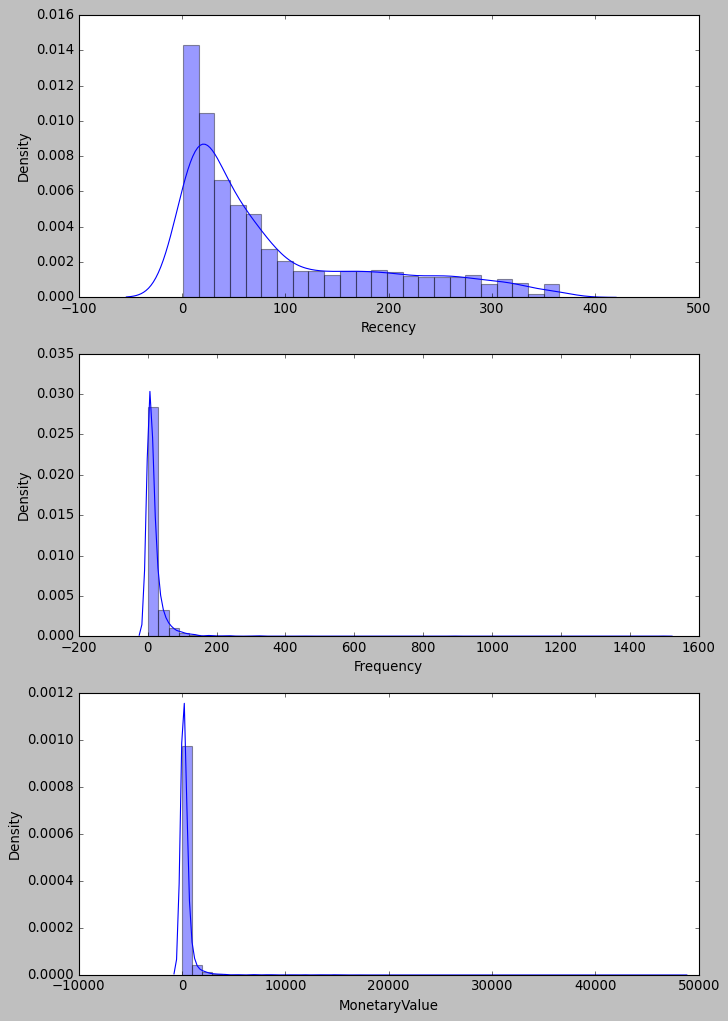

In [31]:
# Plot recency distribution
plt.figure(figsize=(10,15))
plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

In [32]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame\
(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

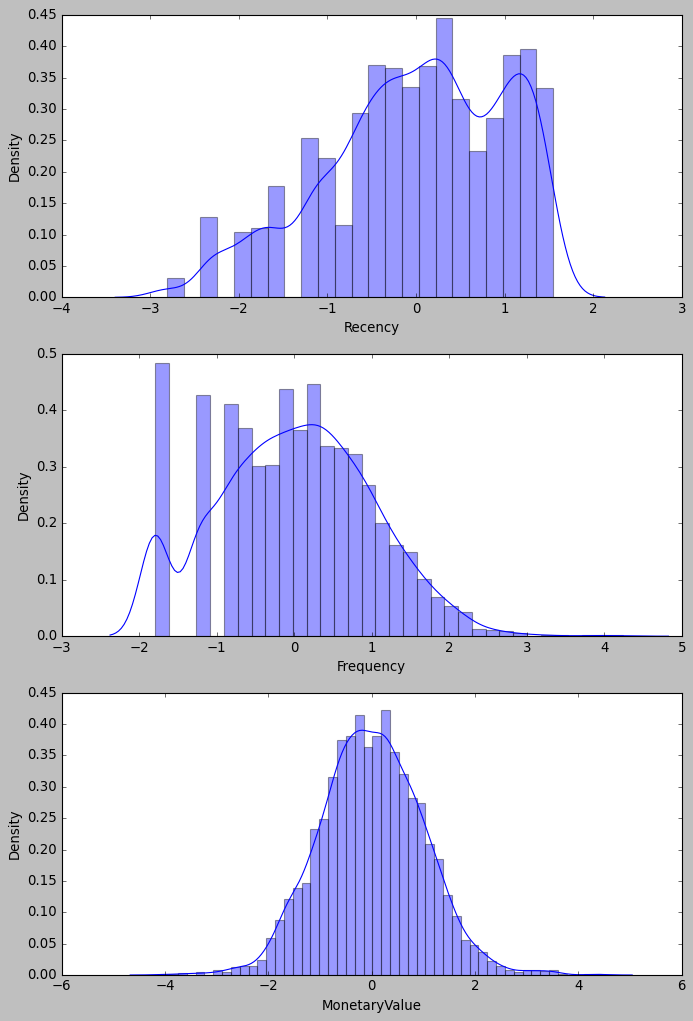

In [33]:
# Plot recency distribution
plt.figure(figsize=(10,15))
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

In [34]:
# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [35]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k2 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k2.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         137.3       5.3          91.9  2024
1          31.9      35.4         719.2  1619

In [36]:
# Fit KMeans and calculate SSE for each k
sse={}
for k in range(1, 21):
  
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)
    
    # Assign sum of squared distances
    sse[k] = kmeans.inertia_ 

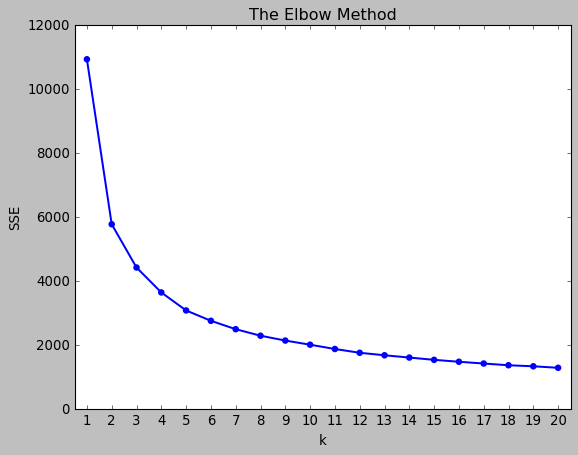

In [37]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [38]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [39]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         164.6       3.1          53.5  1180
1          15.7      50.3        1059.3   889
2          77.1      12.6         219.5  1574

In [40]:
datamart_normalized = pd.DataFrame(datamart_normalized,  
                                   index=datamart_rfm.index,  
                                   columns=datamart_rfm.columns) 
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']

In [41]:
# datamart_normalized.Cluster.head(20)

In [42]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(datamart_normalized.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value')

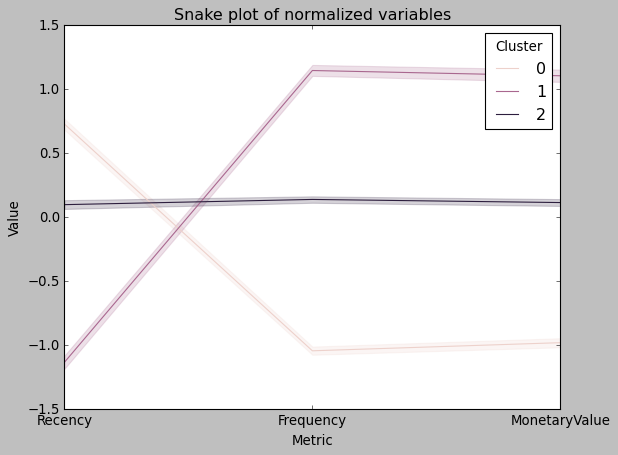

In [43]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [44]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance scores rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0           0.82      -0.84          -0.86
1          -0.83       1.69           1.86
2          -0.15      -0.33          -0.41


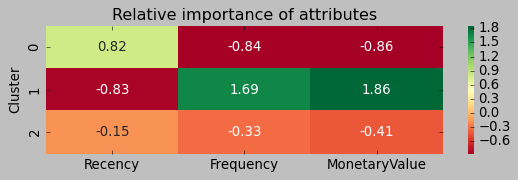

In [45]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()